### Convolution (свёртка)

In [2]:
from PIL import Image
from math import ceil, sqrt, floor

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def convolution(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(b)):
            sum += a[i][j] * b[i][j]
    return sum

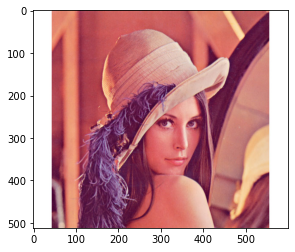

In [8]:
img = Image.open('lenna.jpg')
pixels = img.load()

plt.imshow(img)

In [10]:
img_convolved = img.copy()
pixels2 = img_convolved.load()

In [23]:
'''
filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]
'''

# filter = [
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, 4, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1]
# ]

filter = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

# filter = [
#     [-1, -1, -1],
#     [0, 0, 0],
#     [1, 1, 1]
# ]

'''
filter = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]
'''

'''
filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]
'''

'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]
''';

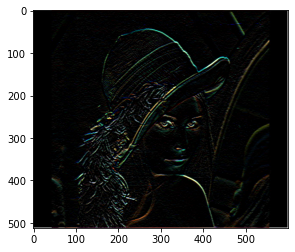

In [24]:
div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
        
if div == 0:
    div = 1
    
for i in range(floor(len(filter)/2), img.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), img.height- floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r,g,b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)
            
        r = np.clip(round(convolution(matrR, filter) / div), 0, 255)
        g = np.clip(round(convolution(matrG, filter) / div), 0, 255)
        b = np.clip(round(convolution(matrB, filter) / div), 0, 255)
        
        pixels2[i,j] = (r,g,b)
        
plt.imshow(img_convolved)